In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
import os.path

In [3]:
if not os.path.isfile('lab_helper.py'):
    ! wget https://github.com/lab-ml-itba/Laboratorio-01/raw/master/lab_helper.py

In [4]:
from lab_helper import plot_boundaries, get_polynimial_set, plot_gaussians

In [5]:
def generate_elipse_data(N=500, random_state=42):
    np.random.seed(random_state)
    X = 2*(np.random.rand(N, 2)-0.5)
    y = 1*(2*(X[:,0]**2 + 2*X[:,1]**2 - 2*X[:,1]*X[:,0])<0.8)
    return X, y

def generate_gaussians_distributions(N=500, random_state=42):
    np.random.seed(random_state)
    X1 = np.random.multivariate_normal([0.5, 0.5], [[0.1,-0.085],[-0.085,0.1]], N//2)
    X2 = np.random.multivariate_normal([-0.25, -0.25], [[0.1,0],[0,0.1]], N//2)
    X = np.append(X1, X2, axis=0)
    y = np.append(np.zeros(N//2), np.ones(N//2))
    return X, y

# Selección del dataset

In [43]:
# X, y = generate_gaussians_distributions()
X, y = generate_elipse_data()

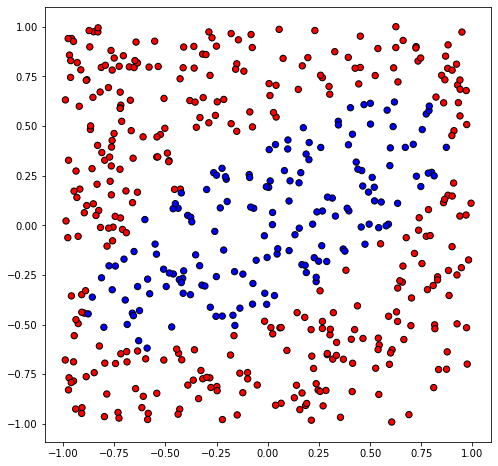

In [44]:
plt.figure(figsize=(8,8))
plot_boundaries(X,y)

In [8]:
model = LogisticRegression(solver='lbfgs')

In [9]:
model.fit(X, y)

LogisticRegression()

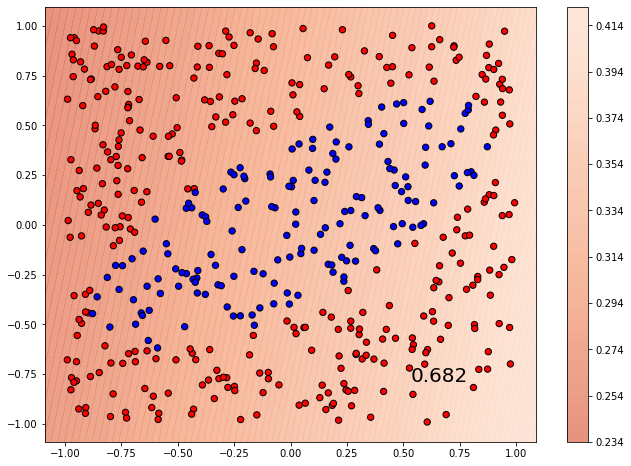

In [10]:
score = model.score(X,y)
plt.figure(figsize=(11,8))
plot_boundaries(X,y, score, probability_func=model.predict_proba, mesh_res=500)

In [11]:
model.predict_proba(np.array([0.5,-0.75]).reshape(1,2))

array([[0.63053289, 0.36946711]])

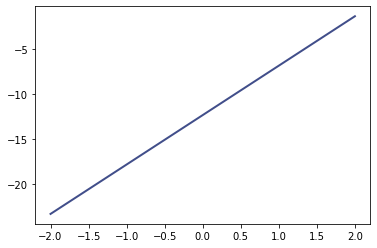

In [12]:
x1 = np.linspace(-2, 2, 100)
x2 = -(model.coef_[0][0] * x1 + model.intercept_[0]) / model.coef_[0][1]
plt.plot(x1, x2, color='#414e8a', linewidth=2)

In [13]:
model.coef_

array([[ 0.33368331, -0.06077631]])

In [14]:
model.coef_[0][0]/model.coef_[0][1]

-5.490351218862921

In [15]:
model.intercept_[0]/model.coef_[0][1]

12.289779256976114

In [16]:
model.intercept_

array([-0.74692749])

### Importo y calculo LogLoss

In [19]:
from sklearn.metrics import log_loss

In [24]:
log_loss(y_true=y, y_pred=model.predict_proba(X)[:,1])

0.6208125613102843

# Regresión polinomial

In [25]:
print('La dimensión de las observaciones',X.shape, 'Tiene que quedar en (500, 6)')

La dimensión de las observaciones (500, 2) Tiene que quedar en (500, 6)


`-1` en `reshape()` indica que en dicha dimensión, el tamaño es el del array en cuestión (no especifico explícitamente la cantidad de filas o columnas)

In [35]:
# Completar la función 
def add_columns(X):
    # Se agrega primer columna elevada al cuadrada como 3er columna
    X = np.append(X, (X[:,0]**2).reshape(-1,1), axis=1)
    # TODO: Agregar producto de primer columna por segunda columna en la cuarta columna
    X = np.append(X, (X[:,0]*X[:,1]).reshape(-1,1), axis=1) # Agregar aca no olvidar el reshape reshape(-1,1)
    # TODO: Agregar segunda columna elevada al cuadrada como 5er columna
    X = np.append(X, (X[:,1]**2).reshape(-1,1), axis=1) # Agregar aca no olvidar el reshape reshape(-1,1)
    # Se agrega la columna de 1s como 6ta columna para despues usar fit_intercept=False. Es necesario para la librería de graficación
    X = np.append(np.ones((len(X), 1)), X, axis=1)
    return X

In [36]:
add_columns(X).shape

(500, 6)

In [37]:
model_poly = LogisticRegression(solver='lbfgs', fit_intercept=False)

In [38]:
model_poly.fit(add_columns(X), y)

LogisticRegression(fit_intercept=False)

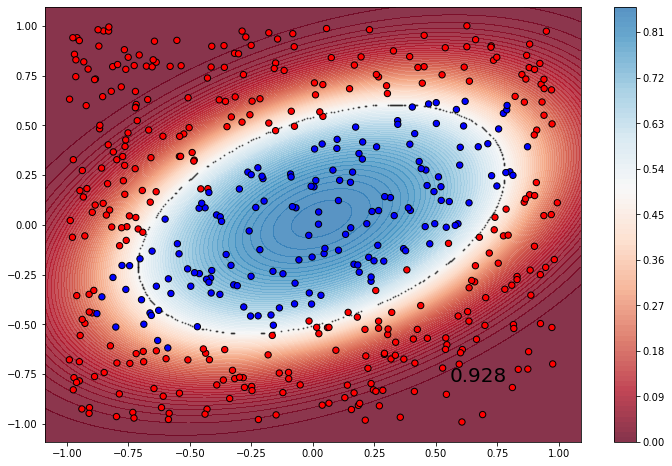

In [39]:
plt.figure(figsize=(12,8))
score = model_poly.score(add_columns(X), y)
plot_boundaries(X,y, score, probability_func=model_poly.predict_proba, mesh_res=500, degree=2)

In [40]:
score

0.928

# Regularización

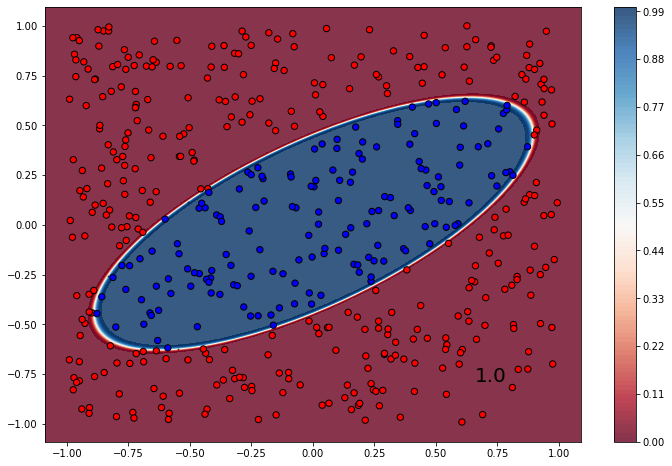

In [51]:
C = 100000 # Modifique el valos de C
model_poly = LogisticRegression(solver='lbfgs', fit_intercept=False, C=C)
model_poly.fit(add_columns(X), y)
plt.figure(figsize=(12,8))
score = model_poly.score(add_columns(X), y)
plot_boundaries(X,y, score, probability_func=model_poly.predict_proba, mesh_res=500, degree=2)